In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/deep_learning_project/

/content/drive/.shortcut-targets-by-id/15gKjVs5Brz2wVAZdIJoqScr7ejFRXBo9/deep_learning_project


In [ ]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
# from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers

In [ ]:
#Load data
X_train=np.load('/content/drive/MyDrive/deep_learning_project/X_train.npy')
X_test=np.load('/content/drive/MyDrive/deep_learning_project/X_test.npy')
y_train=np.load('/content/drive/MyDrive/deep_learning_project/y_train.npy')
y_test=np.load('/content/drive/MyDrive/deep_learning_project/y_test.npy')

# Test K80, V100 and P100

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
import time

#Record time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()
#Early stop
#callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

#Learning rate schedule



#data augmentation
datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)

# Fits the model on batches with real-time data augmentation:
xception_model = xception_pretrained.fit_generator(data_generator,steps_per_epoch = len(X_train) / 64, callbacks=[time_callback],
                                                   epochs = 10, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/10
269/269 [==============================] - 228s 772ms/step - loss: 1.8423 - accuracy: 0.3248 - val_loss: 0.4677 - val_accuracy: 0.8555
Epoch 2/10
269/269 [==============================] - 207s 764ms/step - loss: 0.5197 - accuracy: 0.8219 - val_loss: 0.4364 - val_accuracy: 0.8770
Epoch 3/10
269/269 [==============================] - 206s 763ms/step - loss: 0.3911 - accuracy: 0.8671 - val_loss: 0.6414 - val_accuracy: 0.8467
Epoch 4/10
269/269 [==============================] - 206s 763ms/step - loss: 0.3247 - accuracy: 0.8873 - val_loss: 0.4228 - val_accuracy: 0.8829
Epoch 5/10
269/269 [==============================] - 206s 763ms/step - loss: 0.2636 - accuracy: 0.9097 - val_loss: 0.5571 - val_accuracy: 0.8667
Epoch 6/10
269/269 [==============================] - 206s 763ms/step - loss: 0.2405 - accuracy: 0.9171 - val_loss: 0.4335 - val_accuracy: 0.9019
Epoch 7/10
269/269 [==============================] - 206s 763ms/step - loss: 0.2062 - accuracy: 0.9292 - val_loss: 0.4948 -

In [ ]:
xception = pd.DataFrame(xception_model.history)
xception['time'] = time_callback.times
xception.to_csv('xception_p100.csv')

xception = pd.DataFrame(xception_model.history)
xception['time'] = time_callback.times
xception.to_csv('xception_v100.csv')

xception = pd.DataFrame(xception_model.history)
xception['time'] = time_callback.times
xception.to_csv('xception_k80.csv')

# Example Output

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import time

checkpointer = ModelCheckpoint('best_model.hdf5',monitor='val_accuracy', verbose=1, save_best_only=True)


#data augmentation
datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)

# Fits the model on batches with real-time data augmentation:
xception_model = xception_pretrained.fit_generator(data_generator,steps_per_epoch = len(X_train) / 64, callbacks=[checkpointer],
                                                   epochs = 50, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
269/269 [==============================] - 212s 782ms/step - loss: 0.6395 - accuracy: 0.7824 - val_loss: 0.4821 - val_accuracy: 0.8611

Epoch 00001: val_accuracy improved from -inf to 0.86113, saving model to best_model.hdf5
Epoch 2/50
269/269 [==============================] - 209s 773ms/step - loss: 0.4121 - accuracy: 0.8588 - val_loss: 0.3572 - val_accuracy: 0.8984

Epoch 00002: val_accuracy improved from 0.86113 to 0.89841, saving model to best_model.hdf5
Epoch 3/50
269/269 [==============================] - 209s 771ms/step - loss: 0.3280 - accuracy: 0.8852 - val_loss: 0.4788 - val_accuracy: 0.8749

Epoch 00003: val_accuracy did not improve from 0.89841
Epoch 4/50
269/269 [==============================] - 208s 769ms/step - loss: 0.2850 - accuracy: 0.9027 - val_loss: 0.4883 - val_accuracy: 0.8655

Epoch 00004: val_accuracy did not improve from 0.89841
Epoch 5/50
269/269 [==============================] - 208s 768ms/step - loss: 0.2460 - accuracy: 0.9150 - val_loss: 0.424

In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd

In [ ]:
model = load_model('best_model.hdf5')

labels = ['safe driving'
,'texting - right'
,'talking on the phone - right'
,'texting - left'
,'talking on the phone - left'
,'operating the radio'
,'drinking'
,'reaching behind'
,'hair and makeup'
,'talking to passenger']

In [ ]:
#Predict label and draw
def predict(image):
  img = cv2.imread(image)
  img = img[50:,120:-50]
  img = cv2.resize(img,(224,224))

  Pred = model.predict(np.array([img]))

  plt.imshow(img[:,:,::-1])
  plt.title(labels[np.argmax(Pred)])
  plt.show()

#Predict probability for labels
def pred_prob(image):
  img = cv2.imread(image)
  img = img[50:,120:-50]
  img = cv2.resize(img,(224,224))

  Pred = model.predict(np.array([img]))
  df = pd.DataFrame({'Label':labels,'Probability':Pred.reshape(-1)})
  return df

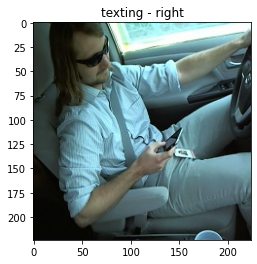

In [ ]:
predict('img_99994.jpg')

In [ ]:
pred_prob('img_99994.jpg')

,Label,Probability
0,safe driving,1.936884e-04
1,texting - right,9.980491e-01
2,talking on the phone - right,1.692996e-03
3,texting - left,5.744320e-07
4,talking on the phone - left,2.088757e-07
5,operating the radio,4.786846e-07
6,drinking,5.093293e-07
7,reaching behind,5.966208e-05
8,hair and makeup,1.671403e-06
9,talking to passenger,1.081695e-06


# Accuracy on each classes

In [ ]:
acu = []
for i in range(10):
  acu.append(sum(prediction[np.where(np.where(y_test == 1)[1] == i)] == i)/len(prediction[np.where(np.where(y_test == 1)[1] == i)]))

In [ ]:
import pandas as pd
text = ['safe driving'
,'texting - right'
,'talking on the phone - right'
,'texting - left'
,'talking on the phone - left'
,'operating the radio'
,'drinking'
,'reaching behind'
,'hair and makeup'
,'talking to passenger']

pd.DataFrame({'Label':text,'Accuracy':acu})

,Label,Accuracy
0,safe driving,0.832524
1,texting - right,0.935103
2,talking on the phone - right,0.979885
3,texting - left,0.994987
4,talking on the phone - left,0.929293
5,operating the radio,0.947891
6,drinking,0.880102
7,reaching behind,0.991018
8,hair and makeup,0.689759
9,talking to passenger,0.392157
